In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/NLP_amazon/train_cleaned.csv',header=None)

In [ ]:
data.drop([1],inplace=True,axis=1)

In [ ]:
data.columns=['Polarity','Text']

In [ ]:
def create_polarity(x):
  if x==2:
    return 1
  return 0

data['Polarity']=data['Polarity'].apply(create_polarity)

In [ ]:
def get_len(x):
  return len(x.split(' '))

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize



def sortclean(text):
    
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"we're", "we are", text)
    text = re.sub(r"i'd", "i would", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"how's", "how is", text)
    text = re.sub(r"'ll", " will", text)
    text = re.sub(r"'ve", " have", text)
    text = re.sub(r"'re", " are", text)
    text = re.sub(r"[-()#/@;:<>{}`+=~|.!?,]", "", text)

    return text
import string


def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)


def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


def remove_punct(text):
    exclude = set(string.punctuation)
    s = ''.join(ch for ch in text if ch not in exclude)
    return s
def remove_newlinechar(text):
    return text.replace('newlinechar','')


def clean_df(text):

  text = text.apply(lambda x : x.lower())
  text=text.apply(lambda x : remove_URL(x))    
  text=text.apply(lambda x: sortclean(x))


  

  text=text.apply(lambda x: remove_emoji(x))
      
  text=text.apply(lambda x : remove_html(x))

  text=text.apply(lambda x : remove_punct(x))

  text=text.apply(lambda x : remove_newlinechar(x))

  text=text.replace('\s+', ' ', regex=True)

  return text


In [ ]:
data['cleaned']=clean_df(data['Text'])

In [ ]:
data['Length']=data['cleaned'].apply(get_len)

In [ ]:
data.drop('Text',axis=1,inplace=True)

In [ ]:
data.head()

,Polarity,cleaned,Length
0,1,this sound track was beautiful it paints the s...,75
1,1,i am reading a lot of reviews saying that this...,94
2,1,this soundtrack is my favorite music of all ti...,129
3,1,i truly like this soundtrack and i enjoy video...,115
4,1,if you have played the game you know how divin...,79


In [ ]:
data.to_csv('/content/drive/MyDrive/NLP_amazon/train_cleaned.csv',sep=';',index=False)

In [ ]:
#end of data filtering,start of selecting groups


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/NLP_amazon/train_cleaned.csv',sep=';')

In [ ]:
data=data[data['Length']<=150]

In [ ]:
lengths=data.Length

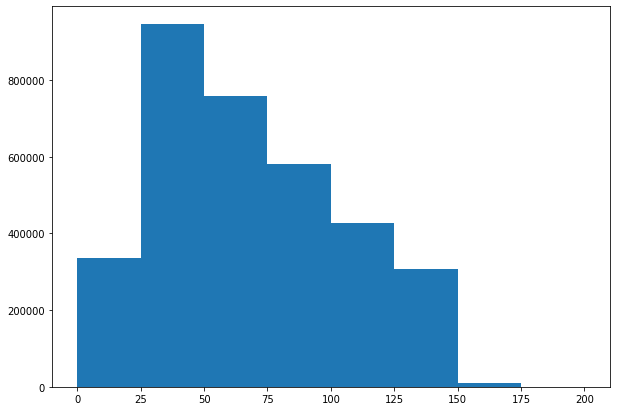

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
 
 
# Creating dataset

 
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(lengths, bins = [0, 25, 50, 75, 100,125,150,175,200])
 
# Show plot
plt.show()

In [ ]:
def get_mean_diff(a,b):
  dis=[]
  for i in range(len(a)):
    dis.append(abs(a[i]-b[i]))
  return np.mean(dis)



In [ ]:
#Code for plotting sequence-length category-wise distribution of sentiments.

def plot(x):
  ranges={}
  i=1
  while x*i<=150:
    ranges[x*i]=[0,0]
    i+=1
  if x*(i-1)!=150:
    ranges[x*i]=[0,0]
  for ind,row in data.iterrows():
    l=((row[2]//x)+(int(row[2]%10>0 or row[2]<x)))*x
    ranges[l][row[0]]+=1
  return ranges


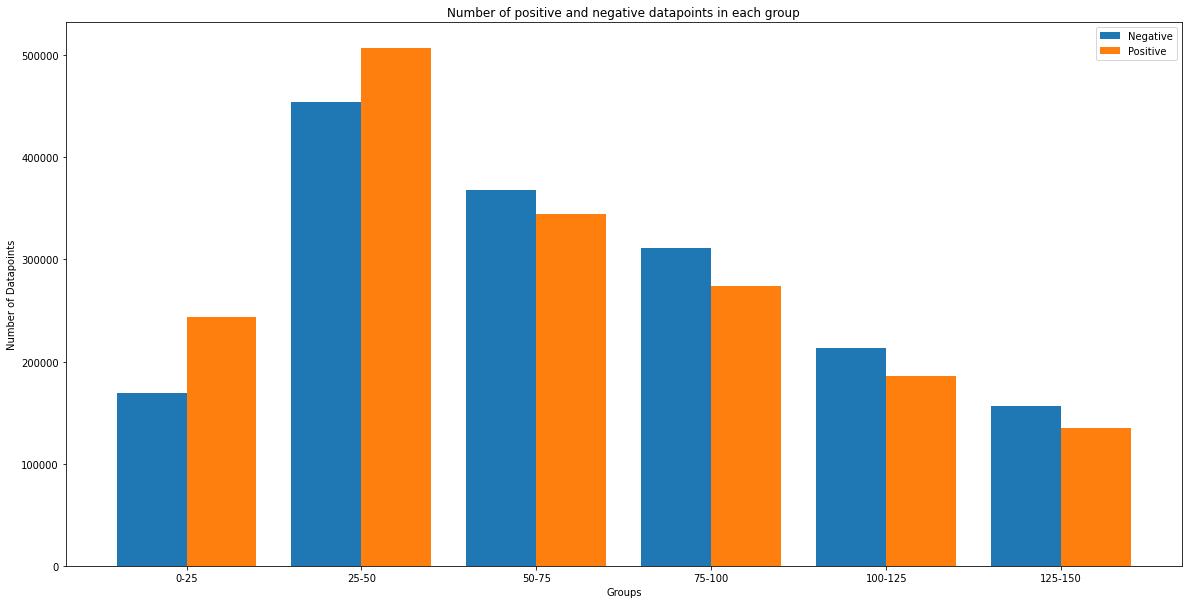

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_graph(x):
  ranges=plot(x)
  X=[]
  i=1
  while x*i<=150:
    X.append(str(x*(i-1))+'-'+str(x*i))
    i+=1
  if x*(i-1)!=150:
    X.append(str(x*(i-1))+' and above')
  plt.subplots(figsize =(20, 10))
  y1=[ranges[x][0] for x in ranges]
  y2=[ranges[x][1] for x in ranges]
  X_axis = np.arange(len(X))
  
  plt.bar(X_axis - 0.2, y1, 0.4, label = 'Negative')
  plt.bar(X_axis + 0.2, y2, 0.4, label = 'Positive')
    
  plt.xticks(X_axis, X)
  plt.xlabel("Groups")
  plt.ylabel("Number of Datapoints")
  plt.title("Number of positive and negative datapoints in each group"+str())
  plt.legend()
  plt.show()
  

plot_graph(25)


In [ ]:
def get_mean_diff(a,b):
  t=[]
  for i in range(len(a)):
    t.append(abs(a[i]-b[i]))
  return np.mean(t,axis=0)

In [ ]:
def get_diff(arr):
  diffs=[]
  for x in arr:
    ranges=plot(x)
    X=[]
    i=1
    while x*i<=150:
      X.append(str(x*(i-1))+'-'+str(x*i))
      i+=1
    if x*(i-1)!=150:
      X.append(str(x*(i-1))+' and above')
    plt.subplots(figsize =(20, 10))
    y1=[ranges[x][0] for x in ranges]
    y2=[ranges[x][1] for x in ranges]
    y1=np.asarray(y1)
    y2=np.asarray(y2)
    diffs.append(get_mean_diff(y1,y2))
  return diffs
  

[16112.933333333332, 23915.0, 29061.25, 39565.666666666664, 44872.8]


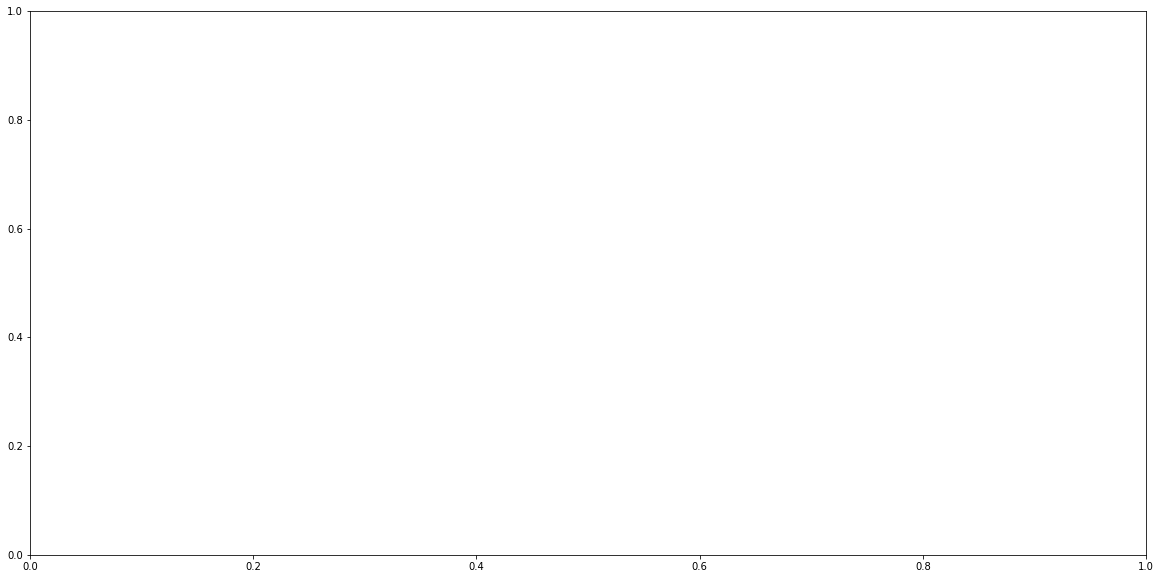

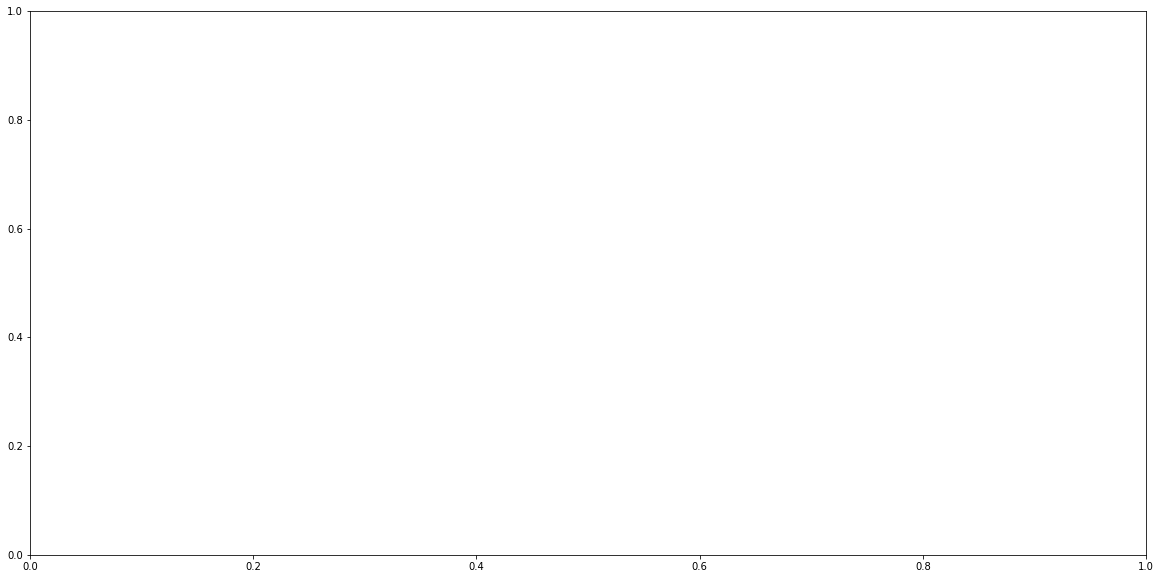

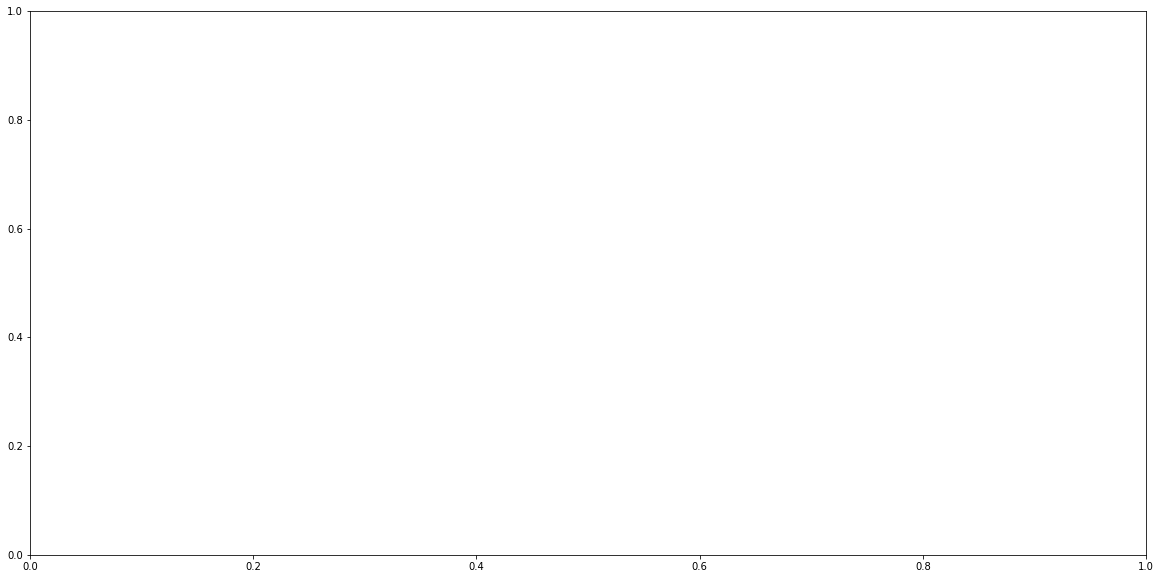

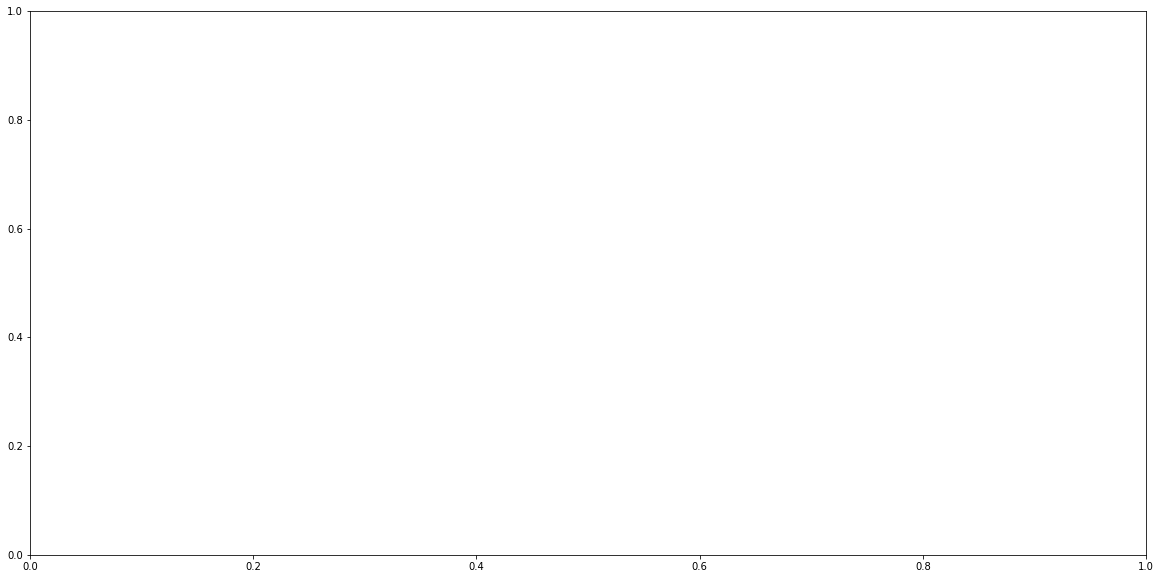

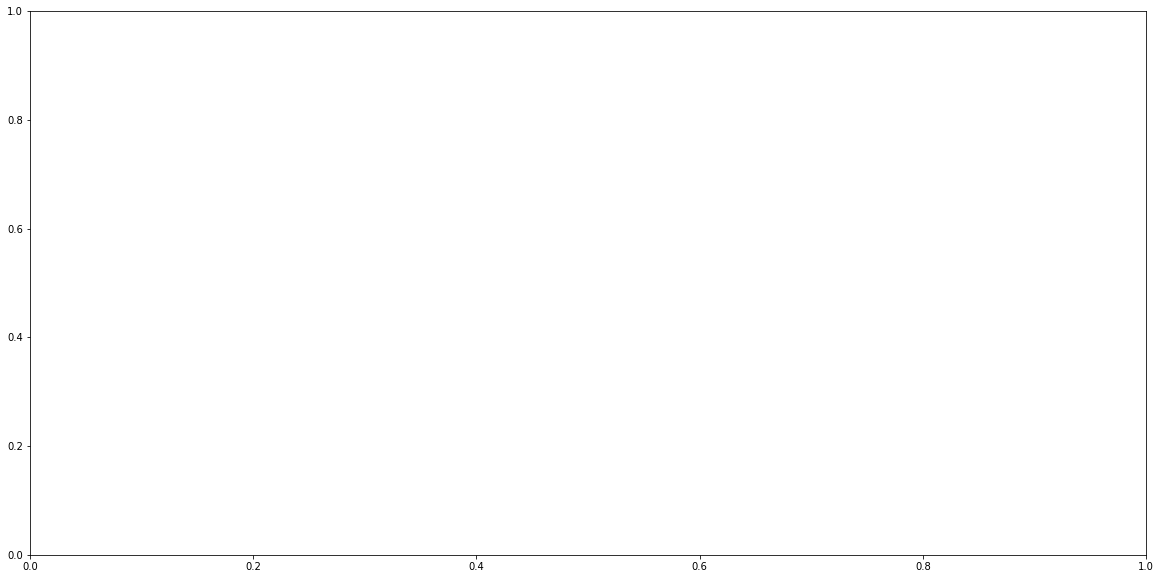

In [ ]:
print(get_diff([10,15,20,25,30]))